In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Exploratory Analysis

In [31]:
original_columns = [
    'city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
    'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
    'property tax (R$)', 'fire insurance (R$)', 'total (R$)'
]

# More meaningful column names
new_columns = [
    'city',
    'area_sqm',
    'num_rooms',
    'num_bathrooms',
    'num_parking_spaces',
    'floor_level',
    'allows_animals',
    'is_furnished',
    'hoa_fee_brl',
    'monthly_rent_brl',
    'property_tax_brl',
    'fire_insurance_brl',
    'total_monthly_cost_brl'
]

column_mapping = dict(zip(original_columns, new_columns))

data = pd.read_csv('brazilian_households.csv', header=0, names=original_columns)

data.rename(columns=column_mapping, inplace=True)

data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


#### Basic Statistics

In [32]:
data.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [33]:
# Shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

if data.isnull().sum().sum() == 0:
    print("No missing values in the dataset.")

Dataset contains 10692 rows and 13 columns.
No missing values in the dataset.


#### Data Correction

In [37]:
categorical_cols = ['city', 'animal', 'furniture']
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Convert 'floor' to numeric if not already
data['floor'] = pd.to_numeric(data['floor'], errors='coerce')

# Add _ to column names (spaces)

for col in data.columns:
    data.rename(columns={col: col.replace(' ', '_')}, inplace=True)

# Verify data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   city                 10692 non-null  category
 1   area                 10692 non-null  int64   
 2   rooms                10692 non-null  int64   
 3   bathroom             10692 non-null  int64   
 4   parking_spaces       10692 non-null  int64   
 5   floor                8231 non-null   float64 
 6   animal               10692 non-null  category
 7   furniture            10692 non-null  category
 8   hoa_(R$)             10692 non-null  int64   
 9   rent_amount_(R$)     10692 non-null  int64   
 10  property_tax_(R$)    10692 non-null  int64   
 11  fire_insurance_(R$)  10692 non-null  int64   
 12  total_(R$)           10692 non-null  int64   
dtypes: category(3), float64(1), int64(9)
memory usage: 867.2 KB


#### Correlation Analysis

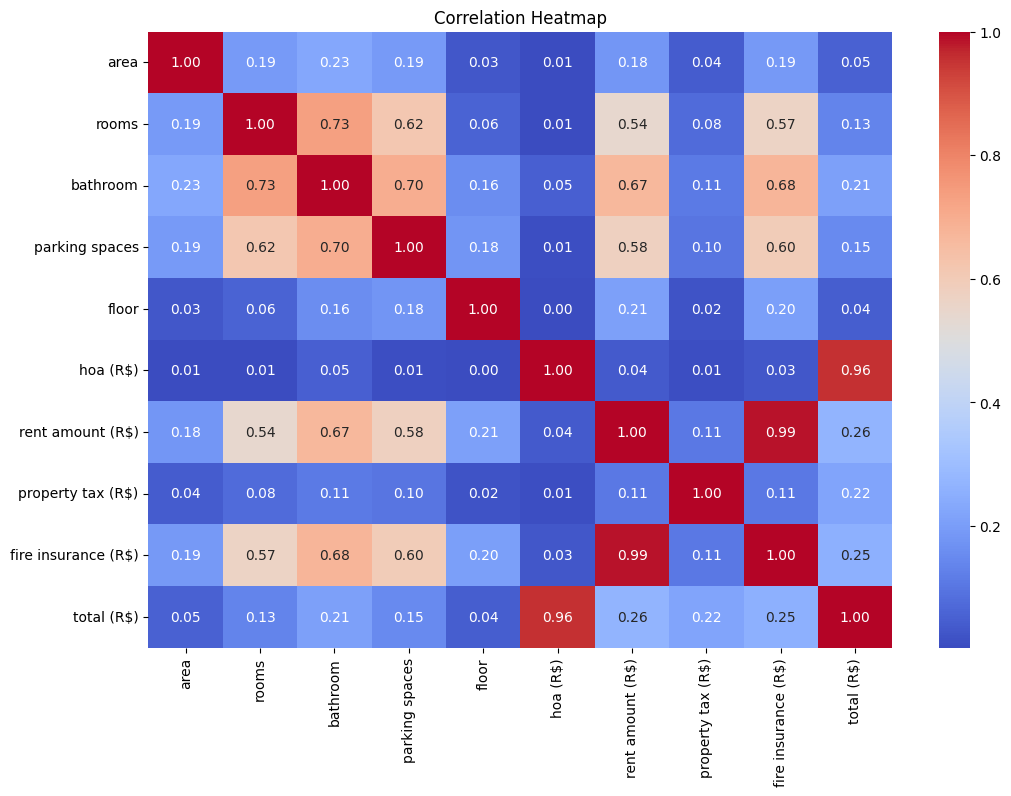

In [35]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Data Visualization

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(data['rent_amount_R$'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Rent Amount (R$)')
plt.xlabel('Rent Amount (R$)')
plt.ylabel('Frequency')
plt.show()


KeyError: 'rent_amount_R$'

<Figure size 800x600 with 0 Axes>